<a href="https://colab.research.google.com/github/Lazyone09/fet-modeller-dln/blob/main/py_torch_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
torch.__version__

'2.5.1+cu124'

In [2]:
scalar = torch.tensor(7)
scalar


tensor(7)

In [3]:
scalar.ndim

0

In [4]:
scalar.item()

7

In [5]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [6]:
# Check shape of vector
vector.shape

torch.Size([2])

In [7]:
# Matrix
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [8]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.8638, 0.5825, 0.0870, 0.7309],
         [0.4815, 0.6483, 0.4024, 0.3753],
         [0.8439, 0.4048, 0.4976, 0.9648]]),
 torch.float32)

In [9]:
random_tensor_4dim = torch.rand(2,2,2,2)
random_tensor_4dim, random_tensor_4dim.shape

(tensor([[[[0.6240, 0.9400],
           [0.2652, 0.8108]],
 
          [[0.3313, 0.6004],
           [0.0590, 0.5780]]],
 
 
         [[[0.8453, 0.1726],
           [0.9461, 0.8750]],
 
          [[0.6872, 0.0845],
           [0.4108, 0.5549]]]]),
 torch.Size([2, 2, 2, 2]))

In [10]:
# Shapes need to be in the right way
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

tensor_A.shape, torch.matmul(tensor_A, tensor_B.T) # (this will error)

(torch.Size([3, 2]),
 tensor([[ 27.,  30.,  33.],
         [ 61.,  68.,  75.],
         [ 95., 106., 117.]]))

In [11]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input
                         out_features=6) # out_features = describes outer value
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


In [12]:
# Create a tensor
import torch
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

In [13]:
# Add an extra dimension
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [14]:
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [15]:
t1 = torch.rand(2,2)
z1 = t1.reshape(4)
t1,z1

(tensor([[0.2666, 0.6274],
         [0.2696, 0.4414]]),
 tensor([0.2666, 0.6274, 0.2696, 0.4414]))

In [16]:
t2 = torch.arange(1.,10.)
t2,t2.T

<ipython-input-16-7f5324a6612b>:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3683.)
  t2,t2.T


(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [52]:
import torch as t
import numpy as np

data = np.genfromtxt("training_data.csv", delimiter=",")
tensor = t.from_numpy(data[1:]) # Vds, Vgs, Id
#tensor = tensor.permute(1,0)
rearranged_tensor  = tensor[:,[1,2,0]]
rearranged_tensor

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.7700e-14, 2.0000e-02],
        [0.0000e+00, 4.7900e-14, 4.0000e-02],
        ...,
        [5.0000e+00, 1.4300e-04, 4.9600e+00],
        [5.0000e+00, 1.4300e-04, 4.9800e+00],
        [5.0000e+00, 1.4400e-04, 5.0000e+00]], dtype=torch.float64)

In [59]:
Vgs = t.unique(rearranged_tensor[:,0])
Vgs.shape, Vgs

(torch.Size([101]),
 tensor([0.0000, 0.0500, 0.1000, 0.1500, 0.2000, 0.2500, 0.3000, 0.3500, 0.4000,
         0.4500, 0.5000, 0.5500, 0.6000, 0.6500, 0.7000, 0.7500, 0.8000, 0.8500,
         0.9000, 0.9500, 1.0000, 1.0500, 1.1000, 1.1500, 1.2000, 1.2500, 1.3000,
         1.3500, 1.4000, 1.4500, 1.5000, 1.5500, 1.6000, 1.6500, 1.7000, 1.7500,
         1.8000, 1.8500, 1.9000, 1.9500, 2.0000, 2.0500, 2.1000, 2.1500, 2.2000,
         2.2500, 2.3000, 2.3500, 2.4000, 2.4500, 2.5000, 2.5500, 2.6000, 2.6500,
         2.7000, 2.7500, 2.8000, 2.8500, 2.9000, 2.9500, 3.0000, 3.0500, 3.1000,
         3.1500, 3.2000, 3.2500, 3.3000, 3.3500, 3.4000, 3.4500, 3.5000, 3.5500,
         3.6000, 3.6500, 3.7000, 3.7500, 3.8000, 3.8500, 3.9000, 3.9500, 4.0000,
         4.0500, 4.1000, 4.1500, 4.2000, 4.2500, 4.3000, 4.3500, 4.4000, 4.4500,
         4.5000, 4.5500, 4.6000, 4.6500, 4.7000, 4.7500, 4.8000, 4.8500, 4.9000,
         4.9500, 5.0000], dtype=torch.float64))

In [58]:
CV_char = rearranged_tensor[:,1:]
CV_char.shape, CV_char

(torch.Size([25351, 2]),
 tensor([[0.0000e+00, 0.0000e+00],
         [2.7700e-14, 2.0000e-02],
         [4.7900e-14, 4.0000e-02],
         ...,
         [1.4300e-04, 4.9600e+00],
         [1.4300e-04, 4.9800e+00],
         [1.4400e-04, 5.0000e+00]], dtype=torch.float64))

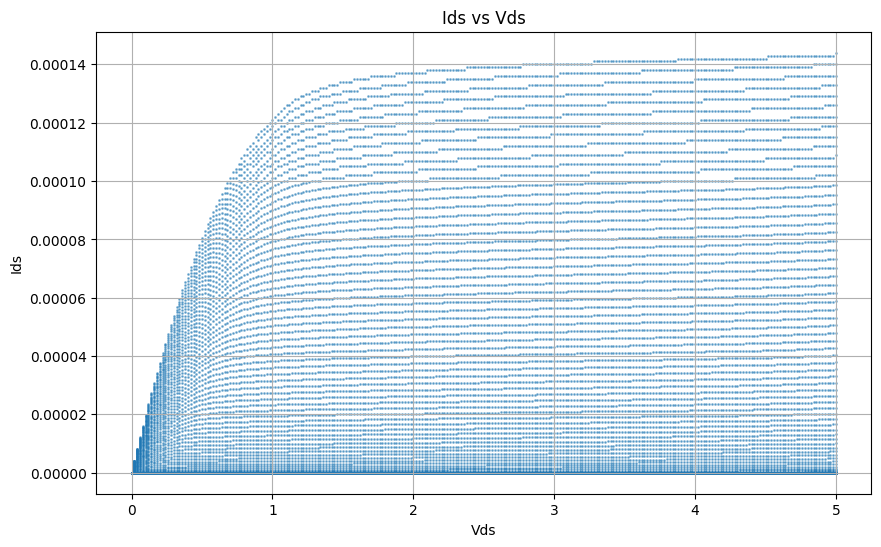

In [60]:
import matplotlib.pyplot as plt

# Step 1: Convert the tensor to a NumPy array
tensor_np = CV_char.numpy()

# Step 2: Extract Ids and Vds columns
Ids = tensor_np[:, 0]  # First column: Ids
Vds = tensor_np[:, 1]  # Second column: Vds

# Step 3: Plot the data
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(Vds, Ids, s=1, alpha=0.5)  # Scatter plot with small points and transparency
plt.xlabel('Vds')  # X-axis label
plt.ylabel('Ids')  # Y-axis label
plt.title('Ids vs Vds')  # Plot title
plt.grid(True)  # Add a grid
plt.show()  # Display the plot